# Fraud Analytics using Python

*This notebook will walk you through the steps followed to solve a credit card fraud problem. You will learn how to make use of several Machine learning algorithms to solve financial crime problem. Later we'll try to optimise the solution wherever needed using pre-built methods.*

The OLT covers the following topics:

* Introduction to fraud detection
    * Reading the data labels
    * Data resampling and plotting
    * Applying SMOTE
    * Logistic regression with SMOTE 
* Using ML classification to catch fraud and monitoring the right performance metrics
    * Random forest classifier
    * Performance of RF classifier
    * Plotting precision recall curve  
* Performing model adjustments and regression analysis
    * GridSearchCV to find optimal parameters
    * Logistic regression
    * Voting classifier

In [21]:
import pandas as pd

In [22]:
# reading the data
df = pd.read_csv("../data/creditcard.csv")
df.head() # to look at the first few rows of the dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
# Explore the features available in your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

### Data

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,315 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data can't be revealed. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



## Let's look at the class labels

In [24]:
# Counting the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
occ

0    284315
1       492
Name: Class, dtype: int64

In [25]:
# print the ratio of fraud cases
print(occ / len(df))

0    0.998273
1    0.001727
Name: Class, dtype: float64


## Visualizing the data 

In this exercise, you'll look at the data and visualize the fraud to non-fraud ratio. It is always a good starting point in your fraud analysis, to look at your data first, before you make any changes to it.

Text(0, 0.5, 'Frequency')

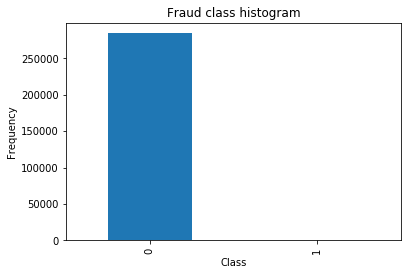

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")


In [27]:
def prep_data(df):
    """
    Prepare the data to train the model
    args: df - dataframe
    returns: X - array of columns
    y - class array to be predicted
    """
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float) # features array and converting the values to float
    y = df.iloc[:, 30]
    y = np.array(y).astype(np.float) # target variable - class
    return X,y


def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [49]:

# Create X and y from the prep_data function 
X, y = prep_data(df)

# Plot our data by running our plot data function on X and y
plot_data(X, y)




array([-1.35980713,  1.19185711, -1.35835406, ...,  1.91956501,
       -0.24044005, -0.53341252])

In [29]:
df.iloc[0].count

<bound method Series.count of Time        0.000000
V1         -1.359807
V2         -0.072781
V3          2.536347
V4          1.378155
V5         -0.338321
V6          0.462388
V7          0.239599
V8          0.098698
V9          0.363787
V10         0.090794
V11        -0.551600
V12        -0.617801
V13        -0.991390
V14        -0.311169
V15         1.468177
V16        -0.470401
V17         0.207971
V18         0.025791
V19         0.403993
V20         0.251412
V21        -0.018307
V22         0.277838
V23        -0.110474
V24         0.066928
V25         0.128539
V26        -0.189115
V27         0.133558
V28        -0.021053
Amount    149.620000
Class       0.000000
Name: 0, dtype: float64>

In [32]:
df.shape

(284807, 31)

## How to manage imbalanced data?

Let's learn different methods which can help us deal with imbalanced data.
There are various resmapling techniques to handle imbalanced data:

* `Random Under Sampling(RUS)`: This reduces the majority class and makes the data balanced.
* `Random Over Sampling(ROS)`: This generated duplicates of the minority class. Inefficient because of duplicacy.
* `Synthetic Minority Oversampling Technique(SMOTE)`: Generates fake realistic data to balance out the data.

We are going to use the best possible option which is SMOTE here.

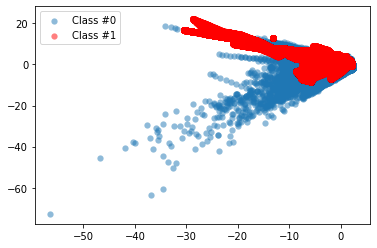

In [38]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
X, y = prep_data(df) # preparing the data

method = SMOTE() # invoking the resampling method

X_resampled, y_resampled = method.fit_sample(X,y) # creating the resampled feature set

plot_data(X_resampled, y_resampled)

In [37]:
pd.value_counts(y_resampled)

1.0    492
0.0    492
dtype: int64

In [111]:
def compare_plot(X,y,X_resampled,y_resampled, method):
    # Start a plot figure
    f, (ax1, ax2) = plt.subplots(1, 2)
    
    # sub-plot number 1, this is our normal data
    c0 = ax1.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0",alpha=0.5)
    c1 = ax1.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1",alpha=0.5, c='r')
    ax1.set_title('Original set')
    
    # sub-plot number 2, this is our oversampled data
    ax2.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=.5)
    ax2.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=.5,c='r')
    ax2.set_title(method)
    
    # some settings and ready to go
    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
                  ncol=2, labelspacing=0.)
    plt.tight_layout(pad=3)
    return plt.show()

0.0    284315
1.0       492
dtype: int64
1.0    284315
0.0    284315
dtype: int64


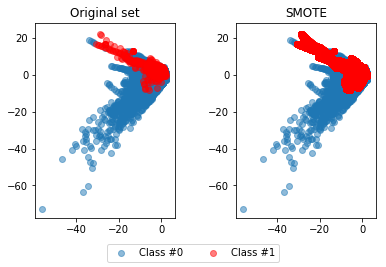

In [112]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

# Run compare_plot
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')


## Rule-based method to detect fraudsters

In this exercise you're going to try finding fraud cases in our credit card dataset the "old way". First you'll define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud. This is common practice within fraud analytics teams.

Statistical thresholds are often determined by looking at the mean values of observations. Let's start this exercise by checking whether feature means differ between fraud and non-fraud cases. Then, you'll use that information to create common sense thresholds. Finally, you'll check how well this performs in fraud detection.

In [68]:
# Get the mean for each group
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [69]:
# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)

# Create a crosstab of flagged fraud cases versus the actual fraud cases
pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])

Flagged Fraud,0,1
Actual Fraud,,
0,283089,1226
1,322,170


> not bad, with this rule, we detect 170 out of 492 fraud cases, but can't detect the other 322, and get 1226 false positives.

## Now, using ML classification to catch fraudsters

In this exercise you'll see what happens when you use a simple machine learning model on our credit card data instead.

Do you think you can beat those results? Remember, you've predicted 170 out of 492 fraud cases, and had 1226 false positives. That's less than half of the cases caught, Also false positives were roughly 3 times the actual amount of fraud cases.

So with that in mind, let's implement a Logistic Regression model.[Poll] If not, you might want to refresh that at this point. But don't worry, you'll be guided through the structure of the machine learning model.

In [113]:
# importing sklearn for training splitting and importing the classifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [71]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

/Users/harshit/projects/oreilly/or_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.89      0.62      0.73       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.95      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85285    11]
 [   56    91]]


We are getting much less false positives, so that's an improvement. Also, we're catching a higher percentage of fraud cases, so that is also better than before. Do you understand why we have less observations to look at in the confusion matrix? Remember we are using only our test data to calculate the model results on. We're comparing the crosstab on the full dataset from the last exercise, with a confusion matrix of only 30% of the total dataset, so that's where that difference comes from

## Logistic regression combined with SMOTE

In this exercise, we're going to take the Logistic Regression model from the previous exercise, and combine that with a SMOTE resampling method. We'll see how to do that efficiently by using a pipeline that combines the resampling method with the model in one go. First, we need to define the pipeline that we're going to use.

In [72]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE

# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE(kind='borderline-2') # instead SMOTE(kind='borderline2')90
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

Now that you have our pipeline defined which is a combination of logistic regression with a SMOTE method, let's run it on the data. You can treat the pipeline as if it were a single machine learning model. Our data X and y are already defined, and the pipeline is defined in the previous exercise. Are you curious to find out what the model results are? Let's give it a try!

In [73]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

/Users/harshit/projects/oreilly/or_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     85296
         1.0       0.07      0.88      0.14       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83701  1595]
 [   18   129]]


Whoops! As you can see, the SMOTE hasn't helped but has added more false positives in our results. We have a very high number of false positives. Remember, not in all cases does resampling necessarily lead to better results. When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias. Nearest neighbors aren't necessarily also fraud cases, so the synthetic samples might 'confuse' the model slightly.

## Fraud detection using labelled data

Now that you're familiar with the main challenges of fraud detection, you're about to learn how to flag fraudulent transactions with supervised learning. You will use classifiers, adjust them and compare them to find the most efficient fraud detection model.

### Natural hit rate

In [74]:
# Count the total number of observations from the length of y
total_obs = len(y)

# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage)

99.82725143693798


## Part 1: Random forest classifier 

In [77]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

In [78]:
X_test.shape, y_test.shape


((85443, 28), (85443,))

## Part 2: Random forest classifier 

In [79]:
# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

/Users/harshit/projects/oreilly/or_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [80]:
from sklearn.metrics import accuracy_score

# Print the accuracy performance metric
print(accuracy_score(y_test, predicted))

0.9994733330992591


## Performance metrics for the RF model

With highly imbalanced fraud data, the AUROC curve is a more reliable performance metric, used to compare different classifiers. Moreover, the classification report tells you about the precision and recall of your model, whilst the confusion matrix actually shows how many fraud cases you can predict correctly

In [81]:
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Print the AUCROC curve, classification report and confusion matrix
print(classification_report(y_test, predicted))

print(confusion_matrix(y_test, predicted, labels=[0, 1]))

print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.95      0.73      0.83       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.97      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85290     6]
 [   39   108]]
AUC ROC score:  0.9214738957860391


We have now obtained more meaningful performance metrics that tell us how well the model performs, given the highly imbalanced data that you're working with. The model predicts 73 cases of fraud, out of which 72 are actual fraud. You have only 1 false positives. This is really good, and as a result you have a very high precision score. You do however, don't catch 19 cases of actual fraud (false negative). We consider the scores based on fraud detection (1).

In [82]:
probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Plotting the Precision Recall Curve
In this curve Precision and Recall are inversely related; as Precision increases, Recall falls and vice-versa.

In [83]:
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

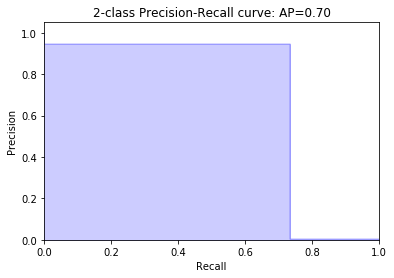

In [84]:
from sklearn.metrics import average_precision_score, precision_recall_curve, roc_curve

# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

The ROC curve plots the true positives vs. false positives , for a classifier, as its discrimination threshold is varied. Since, a random method describes a horizontal curve through the unit interval, it has an AUC of 0.5. Minimally, classifiers should perform better than this, and the extent to which they score higher than one another (meaning the area under the ROC curve is larger), they have better expected performance.

In [85]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predicted)

In [86]:
false_positive_rate


array([0.00000000e+00, 7.03432752e-05, 1.00000000e+00])

In [87]:
true_positive_rate

array([0.        , 0.73469388, 1.        ])

In [88]:
threshold

array([2., 1., 0.])

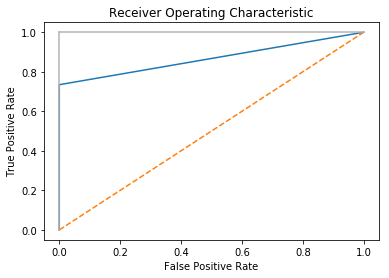

In [89]:
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [90]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', n_estimators=100, random_state=5)###################################

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the roc_auc_score, the classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9442655157166974
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.96      0.74      0.84       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85292     4]
 [   38   109]]


we can see that the model results don't improve drastically. If we mostly care about catching fraud, and not so much about the false positives, this does actually not improve our model at all, albeit a simple option to try.

## Adjusting the RM to fraud detection

In [91]:
def get_model_results(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    print (classification_report(y_test, predicted))
    print (confusion_matrix(y_test, predicted))

In [92]:
# Change the model options
model = RandomForestClassifier(bootstrap=True, ###################################
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud 
                               criterion='entropy',
                               
                               # Change depth of model
                               max_depth=10,
                               
                               # Change the number of samples in leaf nodes
                               min_samples_leaf=10, 
                               
                               # Change the number of trees to use
                               n_estimators=20, 
                               
                               n_jobs=-1, random_state=5)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.91      0.82      0.86       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443

[[85284    12]
 [   27   120]]


You can see by smartly defining more options in the model, you can obtain better predictions. You have effectively reduced the number of false negatives, i.e. you are catching more cases of fraud, whilst keeping the number of false positives low. In this exercise you've manually changed the options of the model

## GridSearchCV to find optimal parameters

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
# Define the parameter sets to test
param_grid = {
    'n_estimators': [1, 30], 
    'max_features': ['auto', 'log2'],  
    'max_depth': [4, 8], 
    'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5) ###################################

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1) ###################################

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

## Model results using GridSearchCV

In [95]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12}, ###################################
                               criterion='gini',
                               n_estimators=30, 
                               max_features='log2',  
                               min_samples_leaf=10, 
                               max_depth=8,
                               n_jobs=-1, random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.82      0.81      0.82       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.91      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85270    26]
 [   28   119]]


We've managed to improve your model even further. The number of false positives has now been slightly reduced even further, which means we are catching more cases of fraud. However, you see that the number of false negatives is still the same. That is that Precision-Recall trade-off in action. To decide which final model is best, you need to take into account how bad it is not to catch fraudsters, versus how many false positives the fraud analytics team can deal with.

## Logistic Regression

In [96]:
# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5) ###################################

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)


/Users/harshit/projects/oreilly/or_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.78      0.82      0.80       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.89      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443

[[85262    34]
 [   27   120]]


As you can see the Logistic Regression has quite different performance from the Random Forest. More false positives, but also a better Recall

## Voting Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
# Import the package
from sklearn.ensemble import VotingClassifier ###################################

# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2', min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

/Users/harshit/projects/oreilly/or_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.85      0.82      0.83       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85275    21]
 [   27   120]]


We can see that by combining the classifiers, you can take the best of multiple models. You've increased the cases of fraud you are catching from 119 to 120, and you only have 5 less false positives. If you do care about catching as many fraud cases as you can, whilst keeping the false positives low, this is a pretty good trade-off. The Logistic Regression as a standalone was quite bad in terms of false positives, and the Random Forest was worse in terms of false negatives. By combining these together you indeed managed to improve performance.

## Adjust weights within the Voting Classifier

In [99]:
# Define the ensemble model
ensemble_model = VotingClassifier(  ###################################
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], 
    voting='soft', 
    weights=[1, 4, 1], 
    flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

/Users/harshit/projects/oreilly/or_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.85      0.82      0.83       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.92      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85274    22]
 [   27   120]]


In [100]:
ensemble_model.estimators_

[LogisticRegression(C=1.0, class_weight={0: 1, 1: 15}, dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=5,
           solver='warn', tol=0.0001, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 12},
             criterion='gini', max_depth=8, max_features='log2',
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=10,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=30, n_jobs=-1, oob_score=False, random_state=5,
             verbose=0, warm_start=False),
 DecisionTreeClassifier(class_weight='balanced', criterion='gini',
             max_depth=None, max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_lea